# **Penguin Classification Analysis**

## ***1 & 2 : Download and Load the dataset into the tool.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# 3. **Perform Below Visualizations**

**● Univariate Analysis**

<ipython-input-12-aa2961e88161>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['culmen_length_mm'],color="red",ax=axes[0,1])


<Axes: >

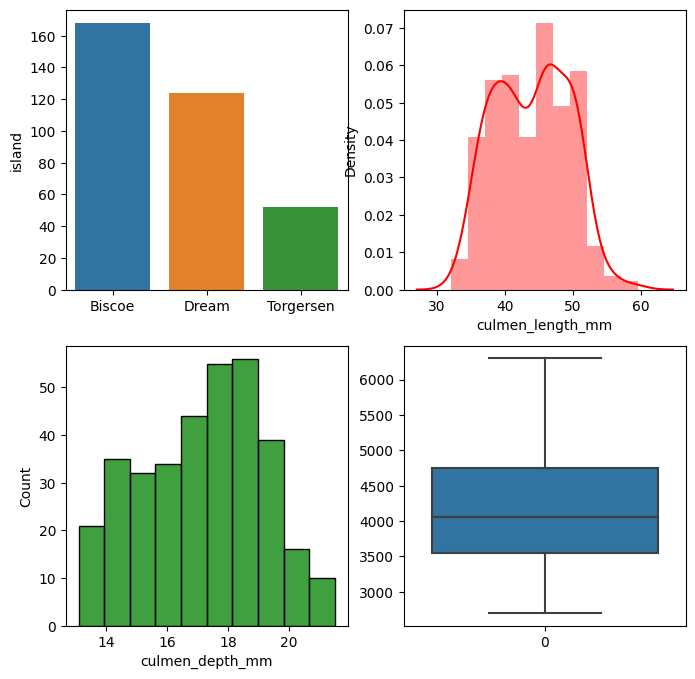

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize']=8,8
fig,axes=plt.subplots(2,2)
sns.histplot(data=df['culmen_depth_mm'],color="green",ax=axes[1,0])
sns.distplot(df['culmen_length_mm'],color="red",ax=axes[0,1])
sns.barplot(x=df['island'].value_counts().index,y=df['island'].value_counts(),ax=axes[0,0])
sns.boxplot(data=df['body_mass_g'],ax=axes[1,1])

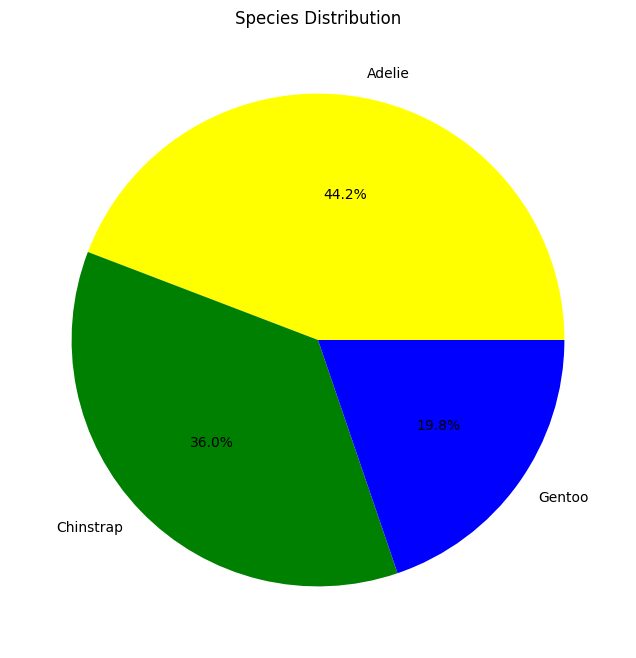

In [16]:
plt.pie(df.species.value_counts(),labels=df.species.unique(),explode=[0,0,0],autopct="%1.1f%%",colors=["yellow",'green',"blue"])
plt.title("Species Distribution")
plt.show()

**● Bi- Variate Analysis**

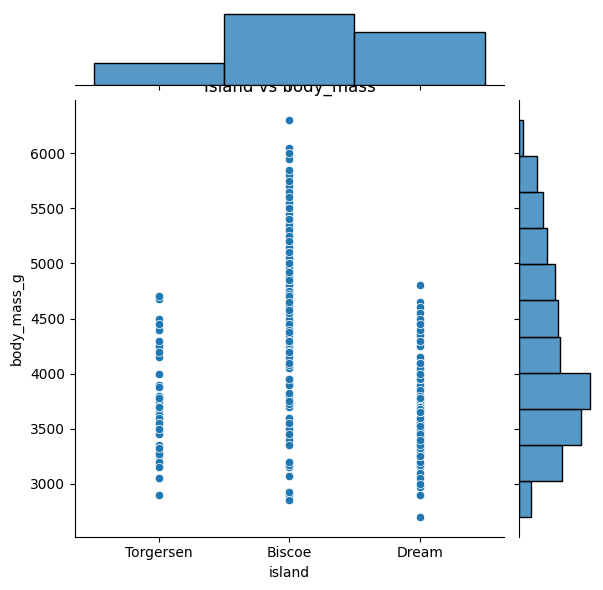

In [18]:
sns.jointplot(x="island",y="body_mass_g",data=df)
plt.title("Island vs body_mass")
plt.show()

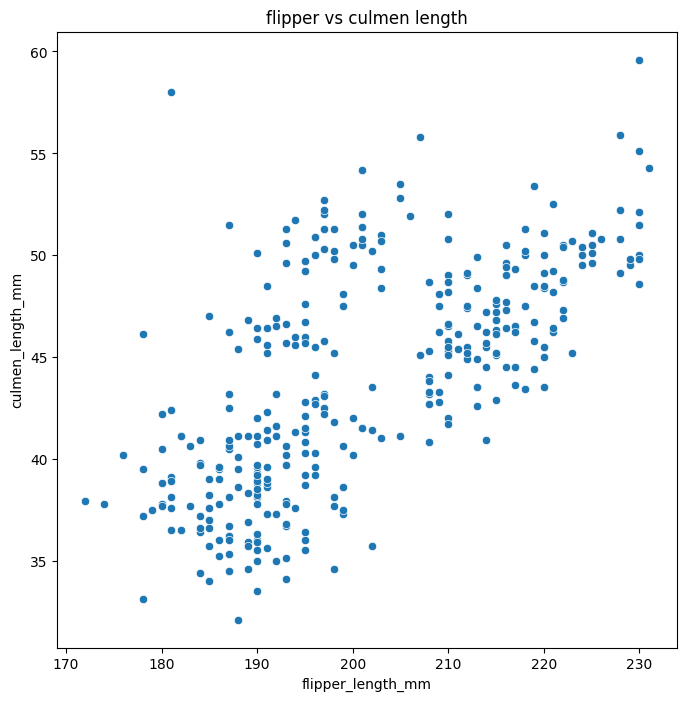

In [19]:
sns.scatterplot(x="flipper_length_mm",y="culmen_length_mm",data=df)
plt.title("flipper vs culmen length")
plt.show()

  **● Multi-Variate Analysis**

<ipython-input-22-bb213cc6d2cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor="white",cmap="prism")


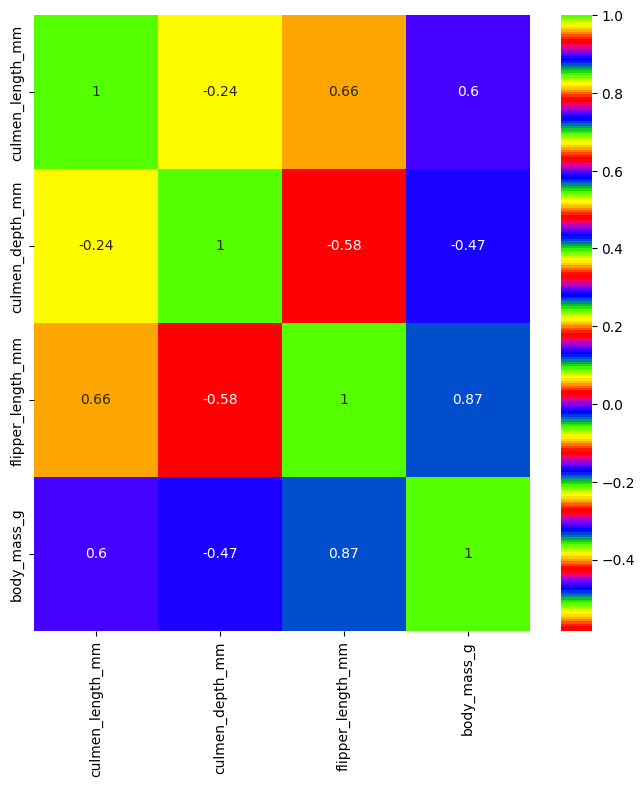

In [22]:
sns.heatmap(df.corr(),annot=True,linecolor="white",cmap="prism")
plt.show()

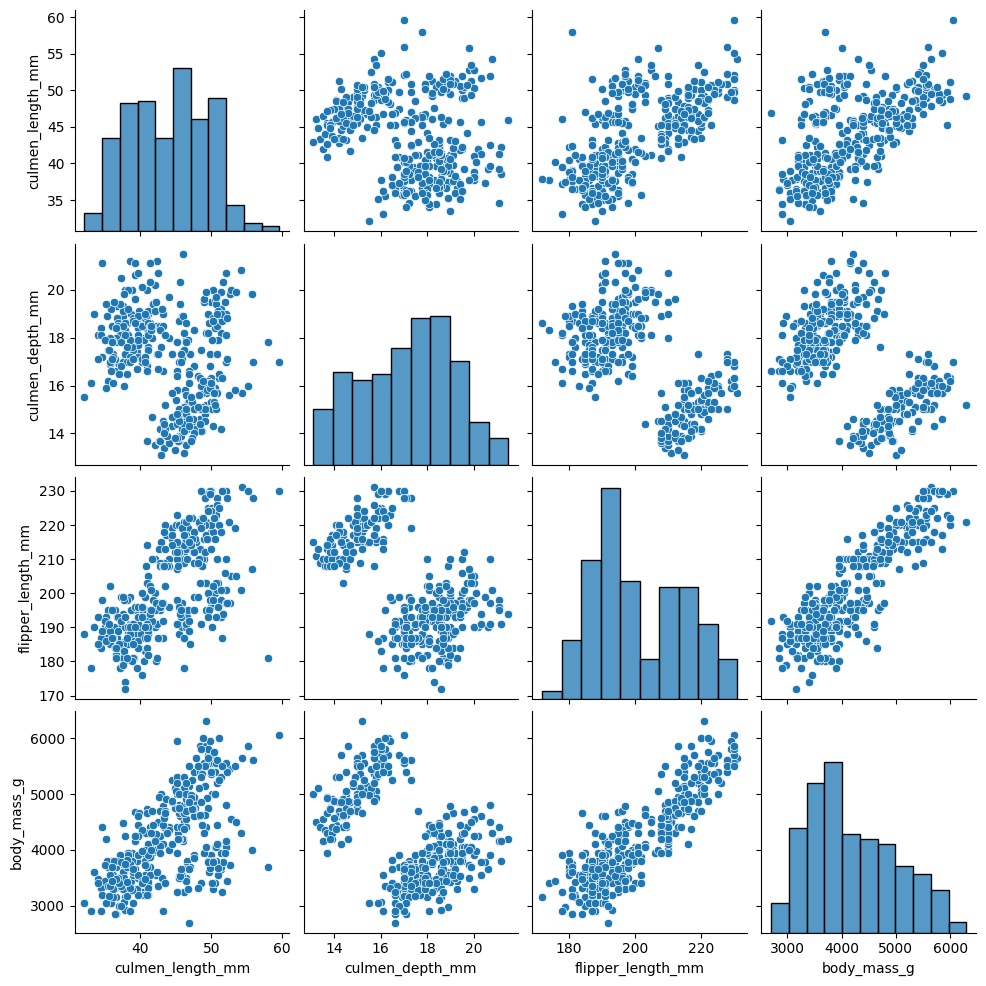

In [23]:
sns.pairplot(df)
plt.show()

# ***4. Perform descriptive statistics on the dataset.***

In [24]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# ***5. Check for Missing values and deal with them.***

In [25]:
df.isnull().any()
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)
most_frequent_category = df['sex'].mode()[0]
df['sex'].fillna(most_frequent_category, inplace=True)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


# ***6. Find the outliers and replace them outliers***

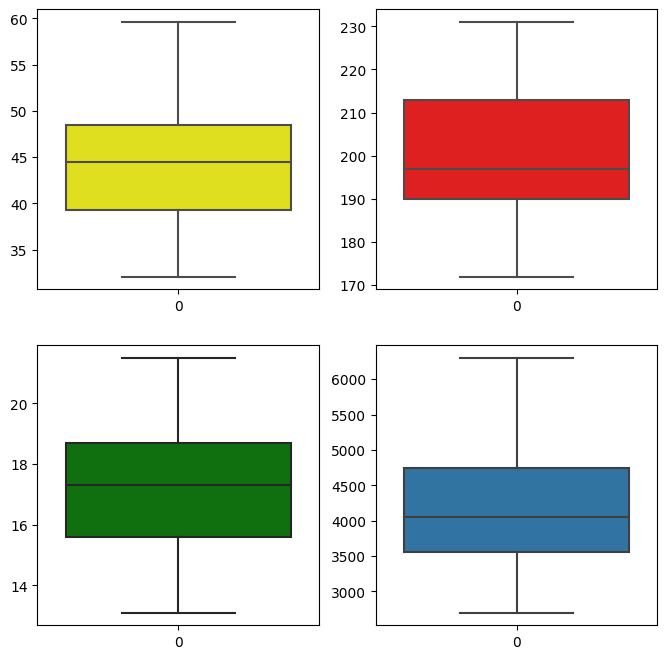

In [28]:
from matplotlib import rcParams
rcParams['figure.figsize']=(8,8)
fig,axes=plt.subplots(2,2)
sns.boxplot(df.culmen_length_mm,color="Yellow",ax=axes[0,0])
sns.boxplot(df.body_mass_g,ax=axes[1,1])
sns.boxplot(df.flipper_length_mm,color="Red",ax=axes[0,1])
sns.boxplot(df.culmen_depth_mm,color="green",ax=axes[1,0])
plt.show()

In [30]:
q1=df.body_mass_g.quantile(0.25)
q3=df.body_mass_g.quantile(0.75)
IQR=q3-q1
upper_limit = q3+1.5*IQR
upper_limit

6550.0

In [31]:
lower_limit =q1-1.5*IQR
lower_limit

1750.0

In [32]:
df.median()

<ipython-input-32-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


culmen_length_mm       44.45
culmen_depth_mm        17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

In [33]:
df['body_mass_g'] = np.where(df['body_mass_g']>upper_limit,30,df['body_mass_g'])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,44.45,17.3,197.0,4050.0,MALE
340,Gentoo,Biscoe,46.80,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.40,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.20,14.8,212.0,5200.0,FEMALE


# ***8. Check for Categorical columns and perform encoding.***

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)
df.island=le.fit_transform(df.island)
df.species=le.fit_transform(df.species)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,2,0,44.45,17.3,197.0,4050.0,2
340,2,0,46.80,14.3,215.0,4850.0,1
341,2,0,50.40,15.7,222.0,5750.0,2
342,2,0,45.20,14.8,212.0,5200.0,1


# ***7.Check the correlation of independent variables with the target***

<Axes: >

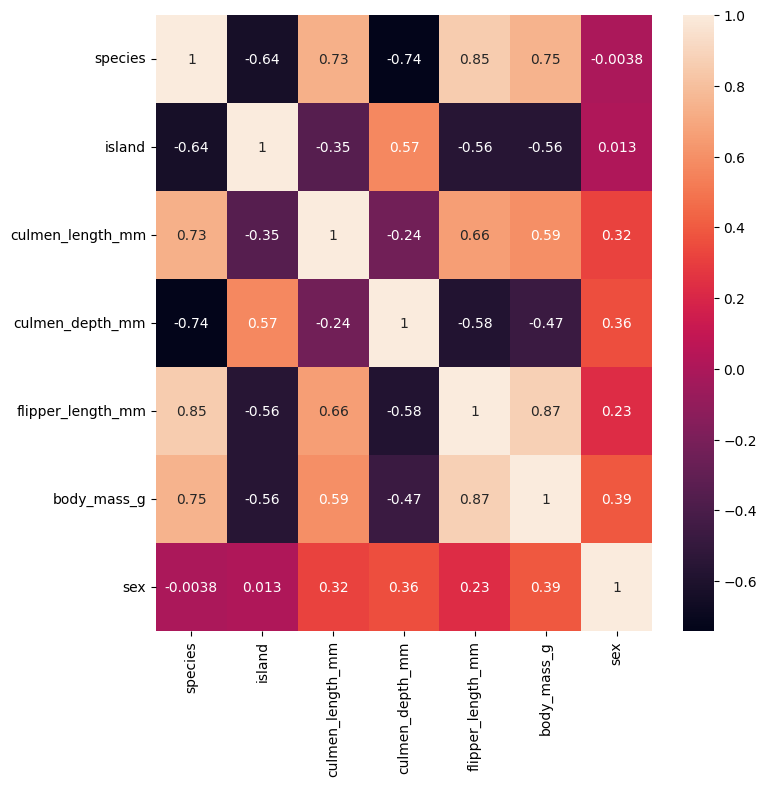

In [39]:
sns.heatmap(df.corr(),annot=True)

In [47]:
df.corr().species.sort_values(ascending=True)

culmen_depth_mm     -0.741282
island              -0.635659
sex                 -0.003823
culmen_length_mm     0.728706
body_mass_g          0.747547
flipper_length_mm    0.850819
species              1.000000
Name: species, dtype: float64

# ***9. Split the data into dependent and independent variables.***

In [50]:
x=df.drop("species",axis=1)
y=df['species']
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


# ***10. Scaling the data***

In [54]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.844076,-0.887622,0.787289,-1.420541,-0.564625,0.960230
1,1.844076,-0.814037,0.126114,-1.063485,-0.502010,-1.017729
2,1.844076,-0.666866,0.431272,-0.420786,-1.190773,-1.017729
3,1.844076,0.096581,0.075255,-0.277964,-0.188936,0.960230
4,1.844076,-1.329133,1.092447,-0.563608,-0.940314,-1.017729
...,...,...,...,...,...,...
339,-0.914020,0.096581,0.075255,-0.277964,-0.188936,0.960230
340,-0.914020,0.528894,-1.450534,1.007436,0.812900,-1.017729
341,-0.914020,1.191161,-0.738500,1.507314,1.939966,0.960230
342,-0.914020,0.234553,-1.196236,0.793203,1.251204,-1.017729


# ***11. Split the data into training and testing***

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.4,random_state=42)
x_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
96,0.465028,-1.071585,0.736430,-0.777841,-0.627240,-1.017729
262,-0.914020,0.252949,-1.755692,0.650381,0.124137,-1.017729
97,0.465028,-0.666866,0.685570,-0.349375,0.186752,0.960230
182,0.465028,-0.556488,-0.280763,-0.992074,-1.253388,-1.017729
68,1.844076,-1.476304,-0.280763,-0.777841,-1.441232,-1.017729


# ***12.check the training and testing data shape.***

In [60]:
x_train.shape

(206, 6)

In [61]:
x_test.shape

(138, 6)